In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants
from scipy.special import kv, iv
from scipy.optimize import curve_fit

In [82]:
file = r'C:\Users\ricca\Desktop\MAGISTRALE\QTLab2324\IRdetection\Fit_Resonances\Results_20_02_set1\20_02_set1_res1.txt'
df = pd.read_csv(file,sep='\t',usecols=['Q','sQ','Qc','sQc','Qi','sQi','T'])

In [83]:
idx = [i for i in range(len(df['T'])) if df['T'][i] not in [130,160,200]]
x = df['T'][idx]
y = df['Qi'][idx]
yerr = df['sQi'][idx]

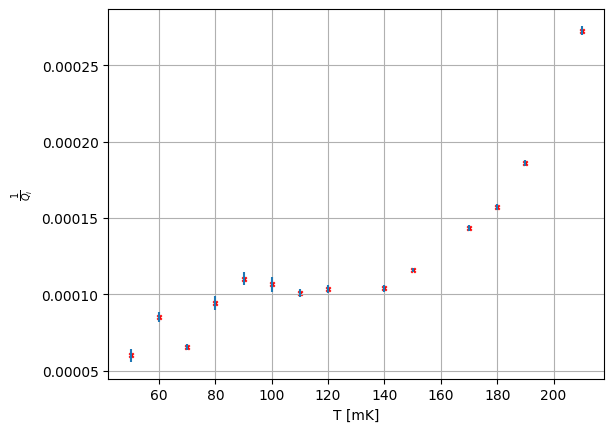

In [84]:
plt.errorbar(x,y,yerr,linestyle='')
plt.scatter(x,y,marker='x',s=10,color='red')
plt.ylabel(r'$\frac{1}{Q_{i}}$')
plt.xlabel('T [mK]')
plt.grid()

In [85]:
KB = constants.Boltzmann
hbar = constants.Planck/(np.pi*2) 
omega = 3.03*1e9
alpha = 0.8669

In [86]:
def model(val_t, delta0, q0):
    val_t = val_t * 1e-3
    xi = hbar * omega / (2 * KB * val_t)
    sigma1 = 4*np.exp(-delta0/(KB*val_t))*np.sinh(xi)*kv(0, xi)
    sigma2 = np.pi*(1-2*np.exp(-delta0/(KB*val_t))*np.exp(-xi)*iv(0, xi))
    
    return alpha*sigma1/sigma2 + q0

In [87]:
d0 = 2.1*1e-23
q0 = y[5]
p = [d0, q0]

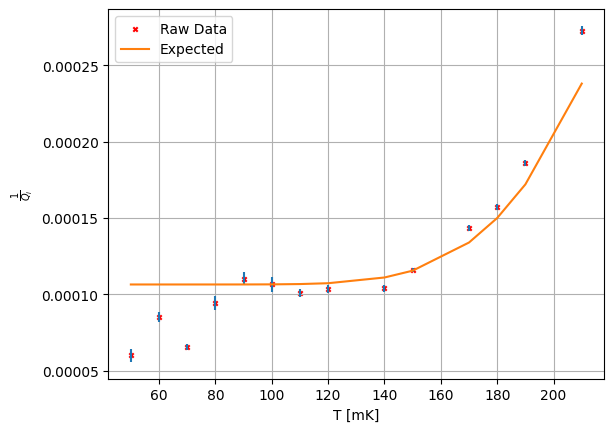

In [88]:
plt.errorbar(x,y,yerr,linestyle='')
plt.scatter(x,y,marker='x',s=10,color='red',label='Raw Data')
plt.plot(x,model(x,*p),label='Expected')
plt.ylabel(r'$\frac{1}{Q_{i}}$')
plt.xlabel('T [mK]')
plt.grid()
plt.legend()

In [99]:
popt, pcov = curve_fit(model,x,y,p,yerr)

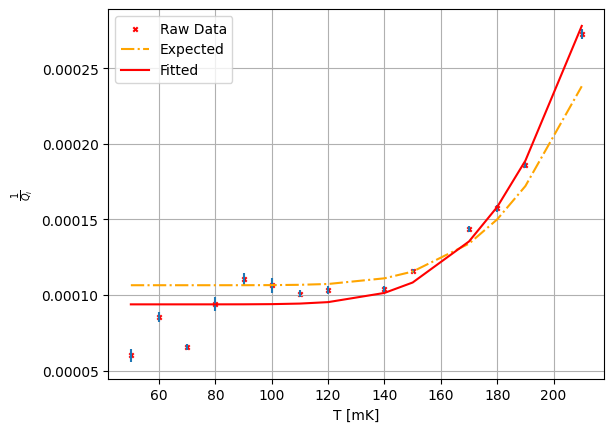

In [100]:
plt.errorbar(x,y,yerr,linestyle='')
plt.scatter(x,y,marker='x',s=10,color='red',label='Raw Data')
plt.plot(x,model(x,*p),label='Expected',color='orange',linestyle='-.')
plt.plot(x,model(x,*popt),label='Fitted',color='red',linestyle='-')
plt.ylabel(r'$\frac{1}{Q_{i}}$')
plt.xlabel('T [mK]')
plt.grid()
plt.legend()

In [120]:
print('Delta : '+f"{(popt[0]/constants.eV*1e3):.5f}"+' +/- '+f"{(np.sqrt(np.diag(pcov)[0])/constants.eV*1e3):.5f}"+' meV')

Delta : 0.12500 +/- 0.00135 meV
